In [ ]:
# Install Prophet if not installed
!pip install prophet

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnv5avcxb/f7y6wbyb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnv5avcxb/zkah0cxg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91661', 'data', 'file=/tmp/tmpnv5avcxb/f7y6wbyb.json', 'init=/tmp/tmpnv5avcxb/zkah0cxg.json', 'output', 'file=/tmp/tmpnv5avcxb/prophet_modelgkbuisyg/prophet_model-20250213045026.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:50:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:50:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:

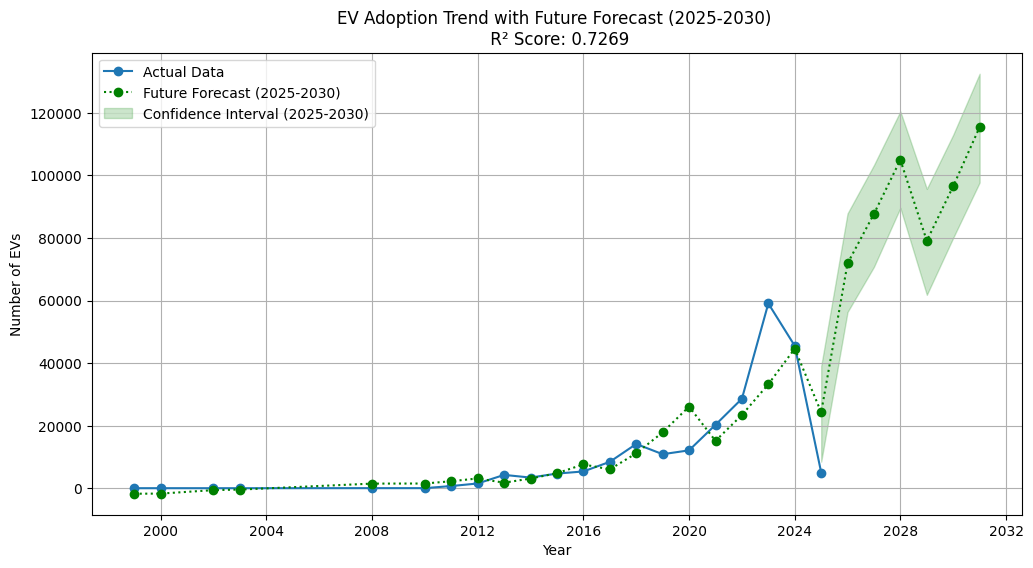

           ds           yhat    yhat_lower     yhat_upper
20 2025-01-01   24256.780783   8483.772545   39059.451291
21 2025-12-31   71843.002704  56317.205787   87833.594517
22 2026-12-31   87681.028859  70757.604244  103288.048197
23 2027-12-31  104956.430981  89607.074663  120478.448419
24 2028-12-31   79083.702104  61806.628538   95686.589048
25 2029-12-31   96538.100888  80048.479776  113002.889094
26 2030-12-31  115436.711426  97720.752850  132501.680330

R² Score: 0.7269 (Accuracy: 72.69%)


In [ ]:
# Install Prophet if not installed
!pip install prophet

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "/content/drive/MyDrive/IEEE (EV PROBLEM)/DATA_SET/Electric_Vehicle_Population_Data.csv"  # Change if needed
df = pd.read_csv(file_path)

# Aggregate EV count by year for time series modeling
ev_adoption_trend = df.groupby("Model Year")["VIN (1-10)"].count().reset_index()
ev_adoption_trend.columns = ["Year", "EV Count"]
ev_adoption_trend = ev_adoption_trend.sort_values(by="Year")

# Convert 'Year' column to datetime format
ev_adoption_trend["Year"] = pd.to_datetime(ev_adoption_trend["Year"], format="%Y")

# Rename columns for Prophet
prophet_df = ev_adoption_trend.rename(columns={"Year": "ds", "EV Count": "y"})

# Define Prophet model with previous settings (72% accuracy)
prophet_model = Prophet(
    seasonality_mode='multiplicative',
    yearly_seasonality=10,
    changepoint_prior_scale=0.1,
    interval_width=0.95
)

# Fit the Prophet model
prophet_model.fit(prophet_df)

# Extend the forecast for the next 5 years (2025-2030)
future_2025_2030 = prophet_model.make_future_dataframe(periods=6, freq='Y')  # 6 periods for 2025-2030

# Generate forecast for 2025-2030
forecast_2025_2030 = prophet_model.predict(future_2025_2030)

# Extract only the future years 2025-2030 for display
future_forecast = forecast_2025_2030[(forecast_2025_2030["ds"].dt.year >= 2025) & (forecast_2025_2030["ds"].dt.year <= 2030)][["ds", "yhat", "yhat_lower", "yhat_upper"]]

# Calculate R² score for accuracy
r2_score_optimized = r2_score(prophet_df["y"].values, forecast_2025_2030.set_index("ds").loc[prophet_df["ds"]]["yhat"].values)

# Plot the extended forecast including 2025-2030
plt.figure(figsize=(12, 6))
plt.plot(prophet_df["ds"], prophet_df["y"], marker="o", linestyle="-", label="Actual Data")
plt.plot(forecast_2025_2030["ds"], forecast_2025_2030["yhat"], linestyle="dotted", marker="o", color="green", label="Future Forecast (2025-2030)")
plt.fill_between(future_forecast["ds"], future_forecast["yhat_lower"], future_forecast["yhat_upper"], color="green", alpha=0.2, label="Confidence Interval (2025-2030)")
plt.xlabel("Year")
plt.ylabel("Number of EVs")
plt.title(f"EV Adoption Trend with Future Forecast (2025-2030) \n R² Score: {r2_score_optimized:.4f}")
plt.legend()
plt.grid(True)
plt.show()

# Print Forecasted EV Counts for 2025-2030
print(future_forecast)

# Display R² Score
print(f"\nR² Score: {r2_score_optimized:.4f} (Accuracy: {r2_score_optimized * 100:.2f}%)")

Mounted at /content/drive
